In [1]:
%pip install psutil matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import psutil
import datetime
import csv

# File to store logs
LOG_FILE = 'resource_monitor.csv'

# Initialize log file with headers if it doesn't exist
def initialize_log_file():
    with open(LOG_FILE, mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(['Timestamp', 'CPU Usage (%)', 'Memory Usage (%)',
                         'Disk Usage (%)', 'Bytes Sent', 'Bytes Received'])

# Monitor CPU, Memory, Disk, and Network usage
def monitor_resources():
    cpu = psutil.cpu_percent(interval=1)
    memory = psutil.virtual_memory().percent
    disk = psutil.disk_usage('/').percent
    net = psutil.net_io_counters()
    return {
        'timestamp': datetime.datetime.now(),
        'cpu': cpu,
        'memory': memory,
        'disk': disk,
        'bytes_sent': net.bytes_sent,
        'bytes_recv': net.bytes_recv
    }

# Log the data to the CSV file
def log_to_csv(data):
    with open(LOG_FILE, mode='a', newline='') as file:
        writer = csv.writer(file)
        writer.writerow([data['timestamp'], data['cpu'], data['memory'],
                         data['disk'], data['bytes_sent'], data['bytes_recv']])

# Initialize log file
initialize_log_file()

# Monitor and log resources
data = monitor_resources()
log_to_csv(data)
print(f"Logged data: {data}")

Logged data: {'timestamp': datetime.datetime(2024, 11, 20, 9, 35, 3, 21290), 'cpu': 32.8, 'memory': 61.2, 'disk': 49.9, 'bytes_sent': 15882303, 'bytes_recv': 1044661865}


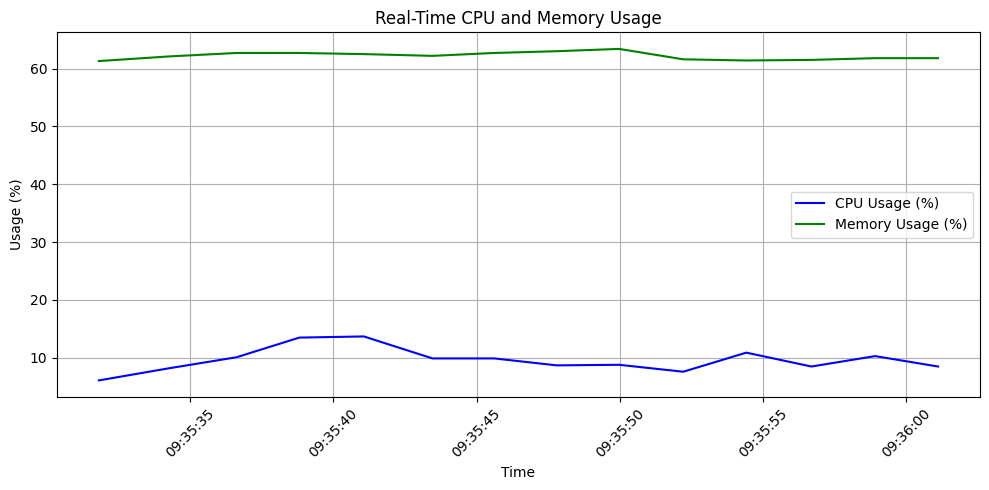

In [3]:
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time

def real_time_plot(duration=30):
    timestamps = []
    cpu_usage = []
    memory_usage = []

    start_time = time.time()
    while time.time() - start_time < duration:
        data = monitor_resources()
        timestamps.append(data['timestamp'])
        cpu_usage.append(data['cpu'])
        memory_usage.append(data['memory'])

        # Real-time plot
        clear_output(wait=True)
        plt.figure(figsize=(10, 5))

        # Plot CPU usage
        plt.plot(timestamps, cpu_usage, label="CPU Usage (%)", color='blue')

        # Plot Memory usage
        plt.plot(timestamps, memory_usage, label="Memory Usage (%)", color='green')

        plt.xlabel("Time")
        plt.ylabel("Usage (%)")
        plt.title("Real-Time CPU and Memory Usage")
        plt.legend()
        plt.grid(True)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

        time.sleep(1)

# Run real-time visualization
real_time_plot(duration=30)

In [4]:
def check_thresholds():
    data = monitor_resources()
    alerts = []

    if data['cpu'] > 80:
        alerts.append(f"⚠ High CPU Usage: {data['cpu']}%")
    if data['memory'] > 85:
        alerts.append(f"⚠ High Memory Usage: {data['memory']}%")
    if data['disk'] > 90:
        alerts.append(f"⚠ High Disk Usage: {data['disk']}%")

    if alerts:
        print("\n".join(alerts))
    else:
        print("All systems are operating within normal limits.")

# Run the threshold checker
check_thresholds()

All systems are operating within normal limits.
